In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import LocalOutlierFactor
from util.VisualizeDataset import VisualizeDataset
from Chapter3.OutlierDetection import DistanceBasedOutlierDetection
from Chapter3.OutlierDetection import DistributionBasedOutlierDetection
%matplotlib inline
from copy import deepcopy

OutlierDistr = DistributionBasedOutlierDetection()
OutlierDist = DistanceBasedOutlierDetection()
DataViz = VisualizeDataset('CH3 Notebook')

<Figure size 1800x1200 with 0 Axes>

In [3]:
df = pd.read_csv('A3_dataset/COMBINED_ch2_result.csv')
for label in df.activity.unique():
    df["label-" + label] = (df['activity'] == label)

In [5]:
outlier_columns = ['acc_x', 'acc_y', 'acc_z', 'grav_x', 'grav_y', 'grav_z', 'lin_x',
       'lin_y', 'lin_z', 'gyr_x', 'gyr_y', 'gyr_z']
acc_columns = ['acc_x', 'acc_y', 'acc_z']
grav_columns = ['grav_x', 'grav_y', 'grav_z']
gyr_columns = ['gyr_x', 'gyr_y', 'gyr_z']
lin_columns = ['lin_x', 'lin_y', 'lin_z']

In [35]:
def pl(df, triplet, n_neighbors, outlier_set):
    cp = deepcopy(df)
    x, y, z  = triplet
    LOF = LocalOutlierFactor(n_neighbors=n_neighbors)
    cp['LOF-' + outlier_set] = LOF.fit_predict(cp[[x, y, z]])
    outliers = cp.loc[cp['LOF-' + outlier_set] == -1]
    inliers = cp[cp['LOF-' + outlier_set] == 1]
    
    fig = plt.figure(figsize=(8, 8), dpi = 400)
    
    ax = fig.add_subplot(projection='3d')
    ax.scatter(inliers[x], inliers[y], inliers[z])
    ax.scatter(outliers[x], outliers[y], outliers[z], marker='x', c='red')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.legend(['Inliers', 'Outliers'])
    ax.set_title(f'Outliers Flagged by LOF(k={n_neighbors}) for {outlier_set.capitalize()} Columns (x, y, z)')
    plt.show()
    cp.loc[cp['LOF-' + outlier_set] == -1, [x, y, z]] = np.nan
    
    return cp

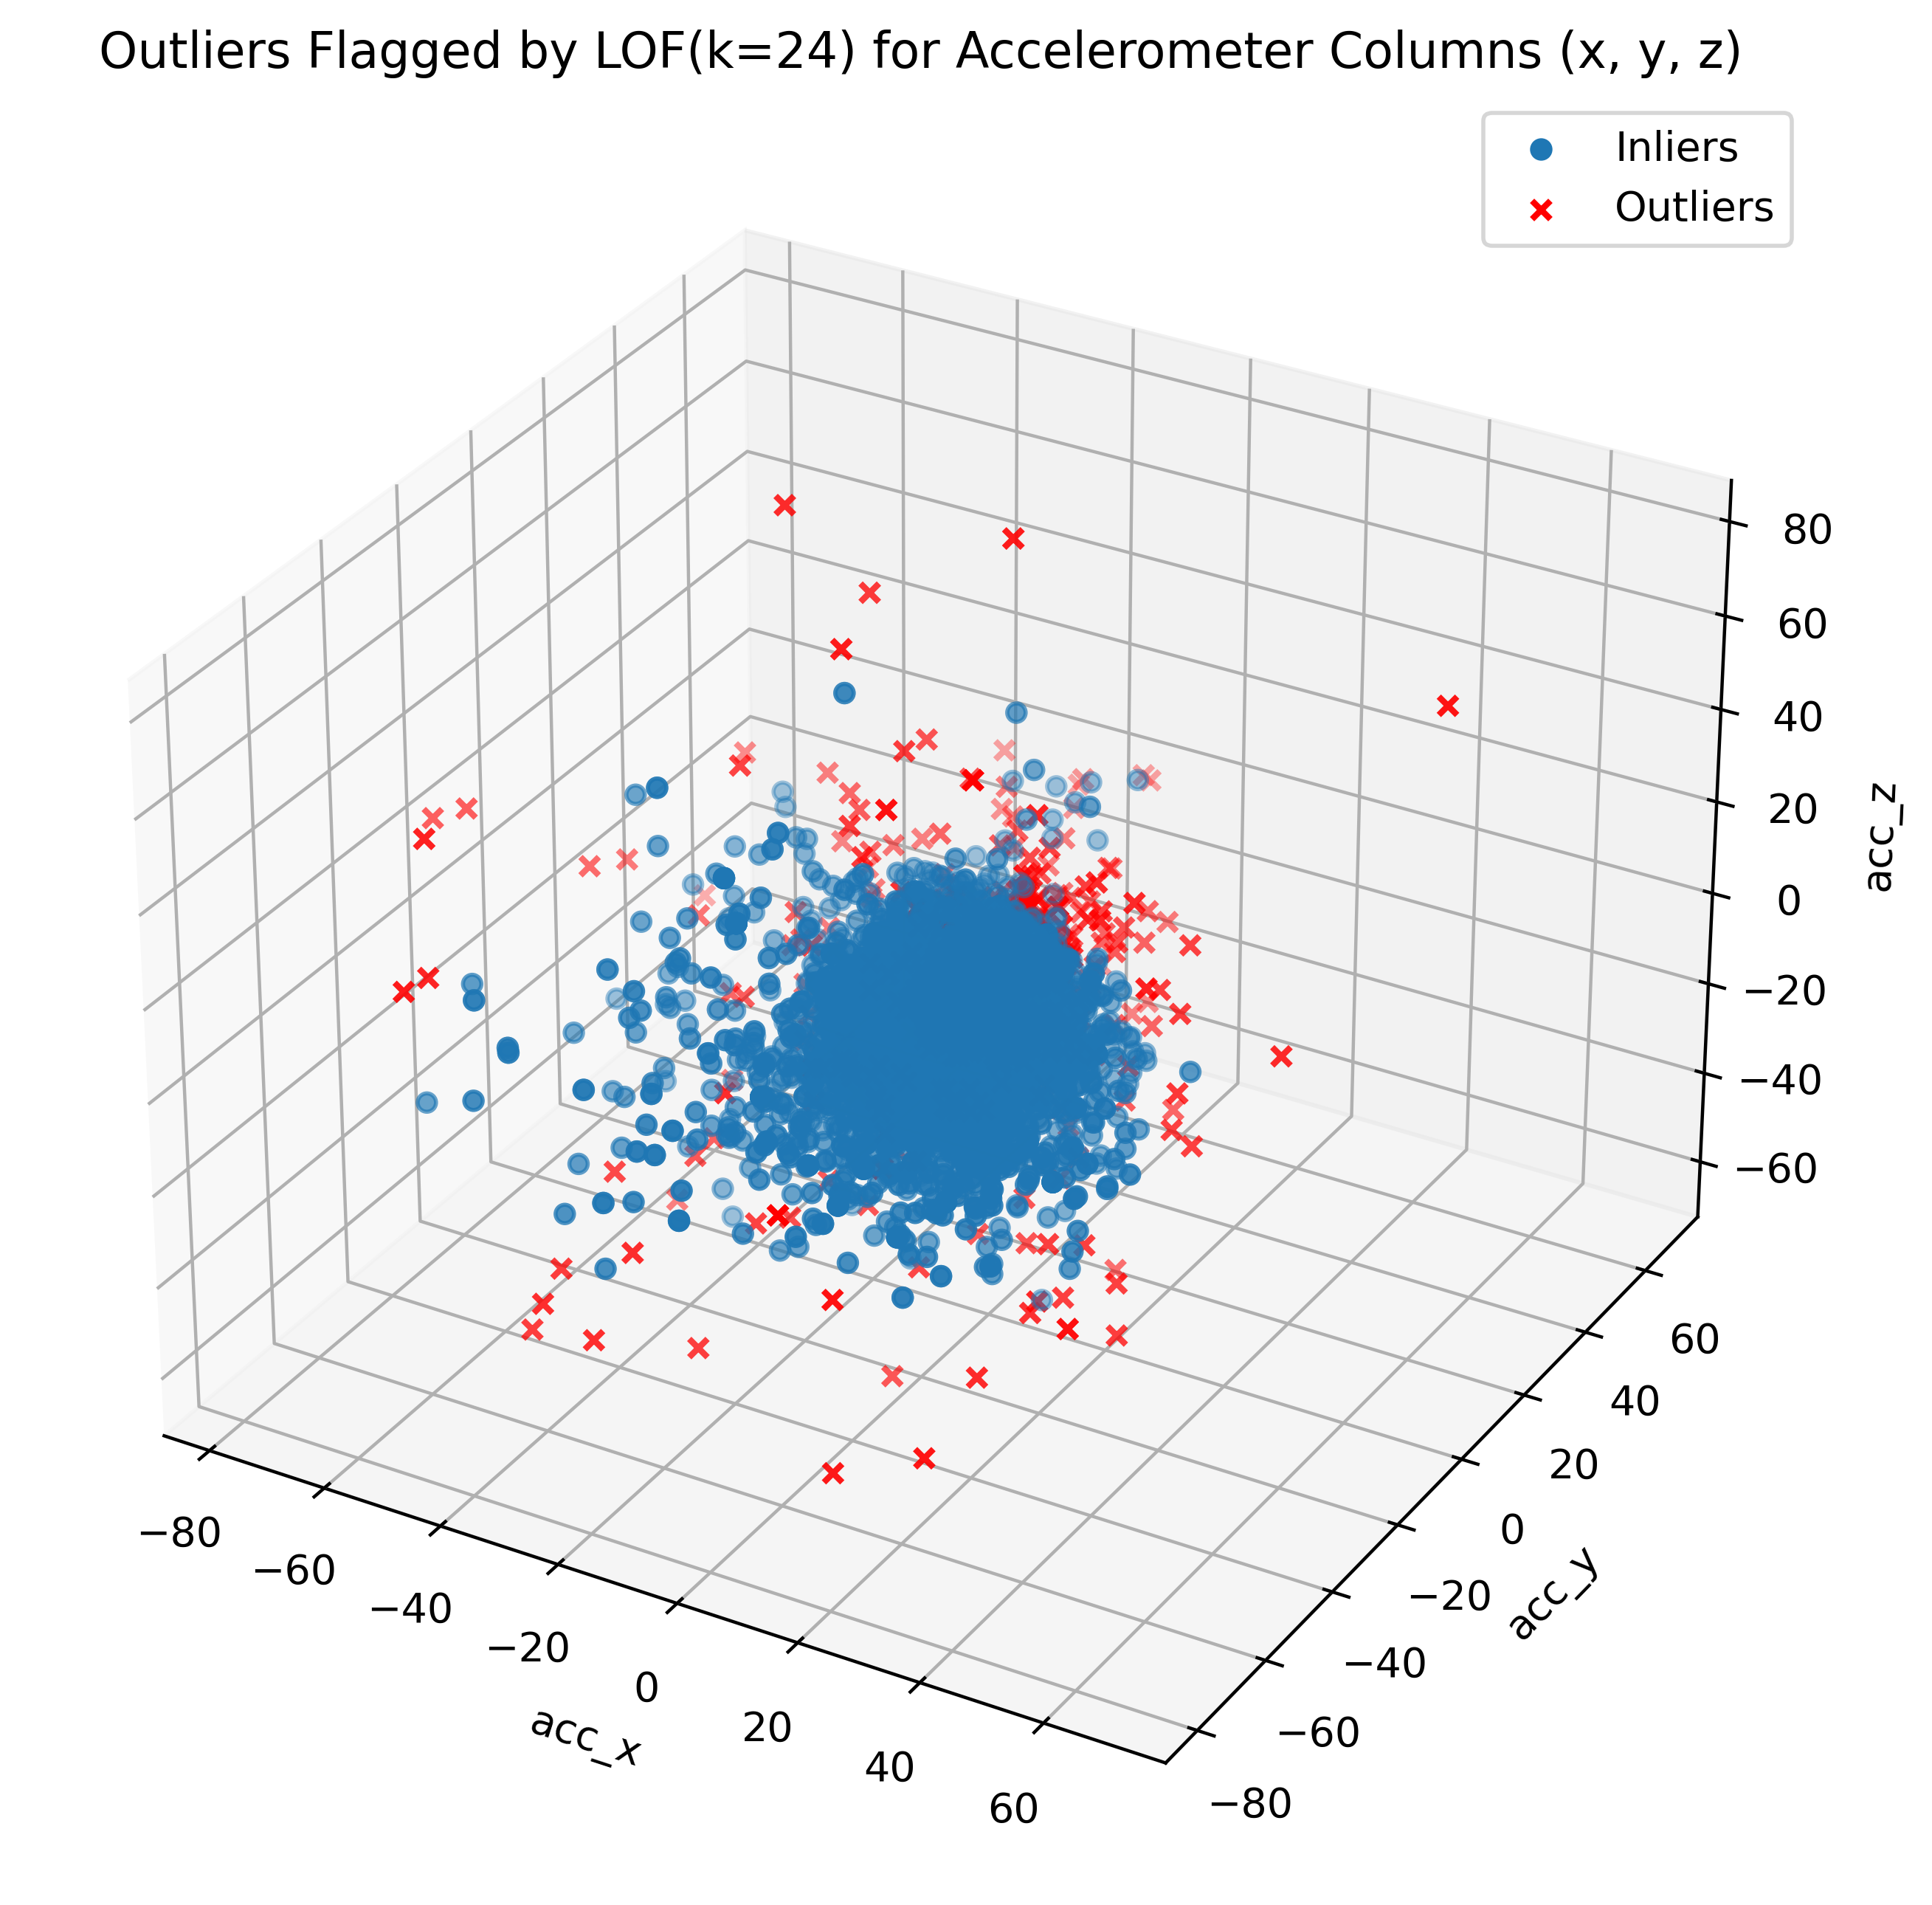

In [31]:
df2 = pl(df, acc_columns, 24, outlier_set="accelerometer")

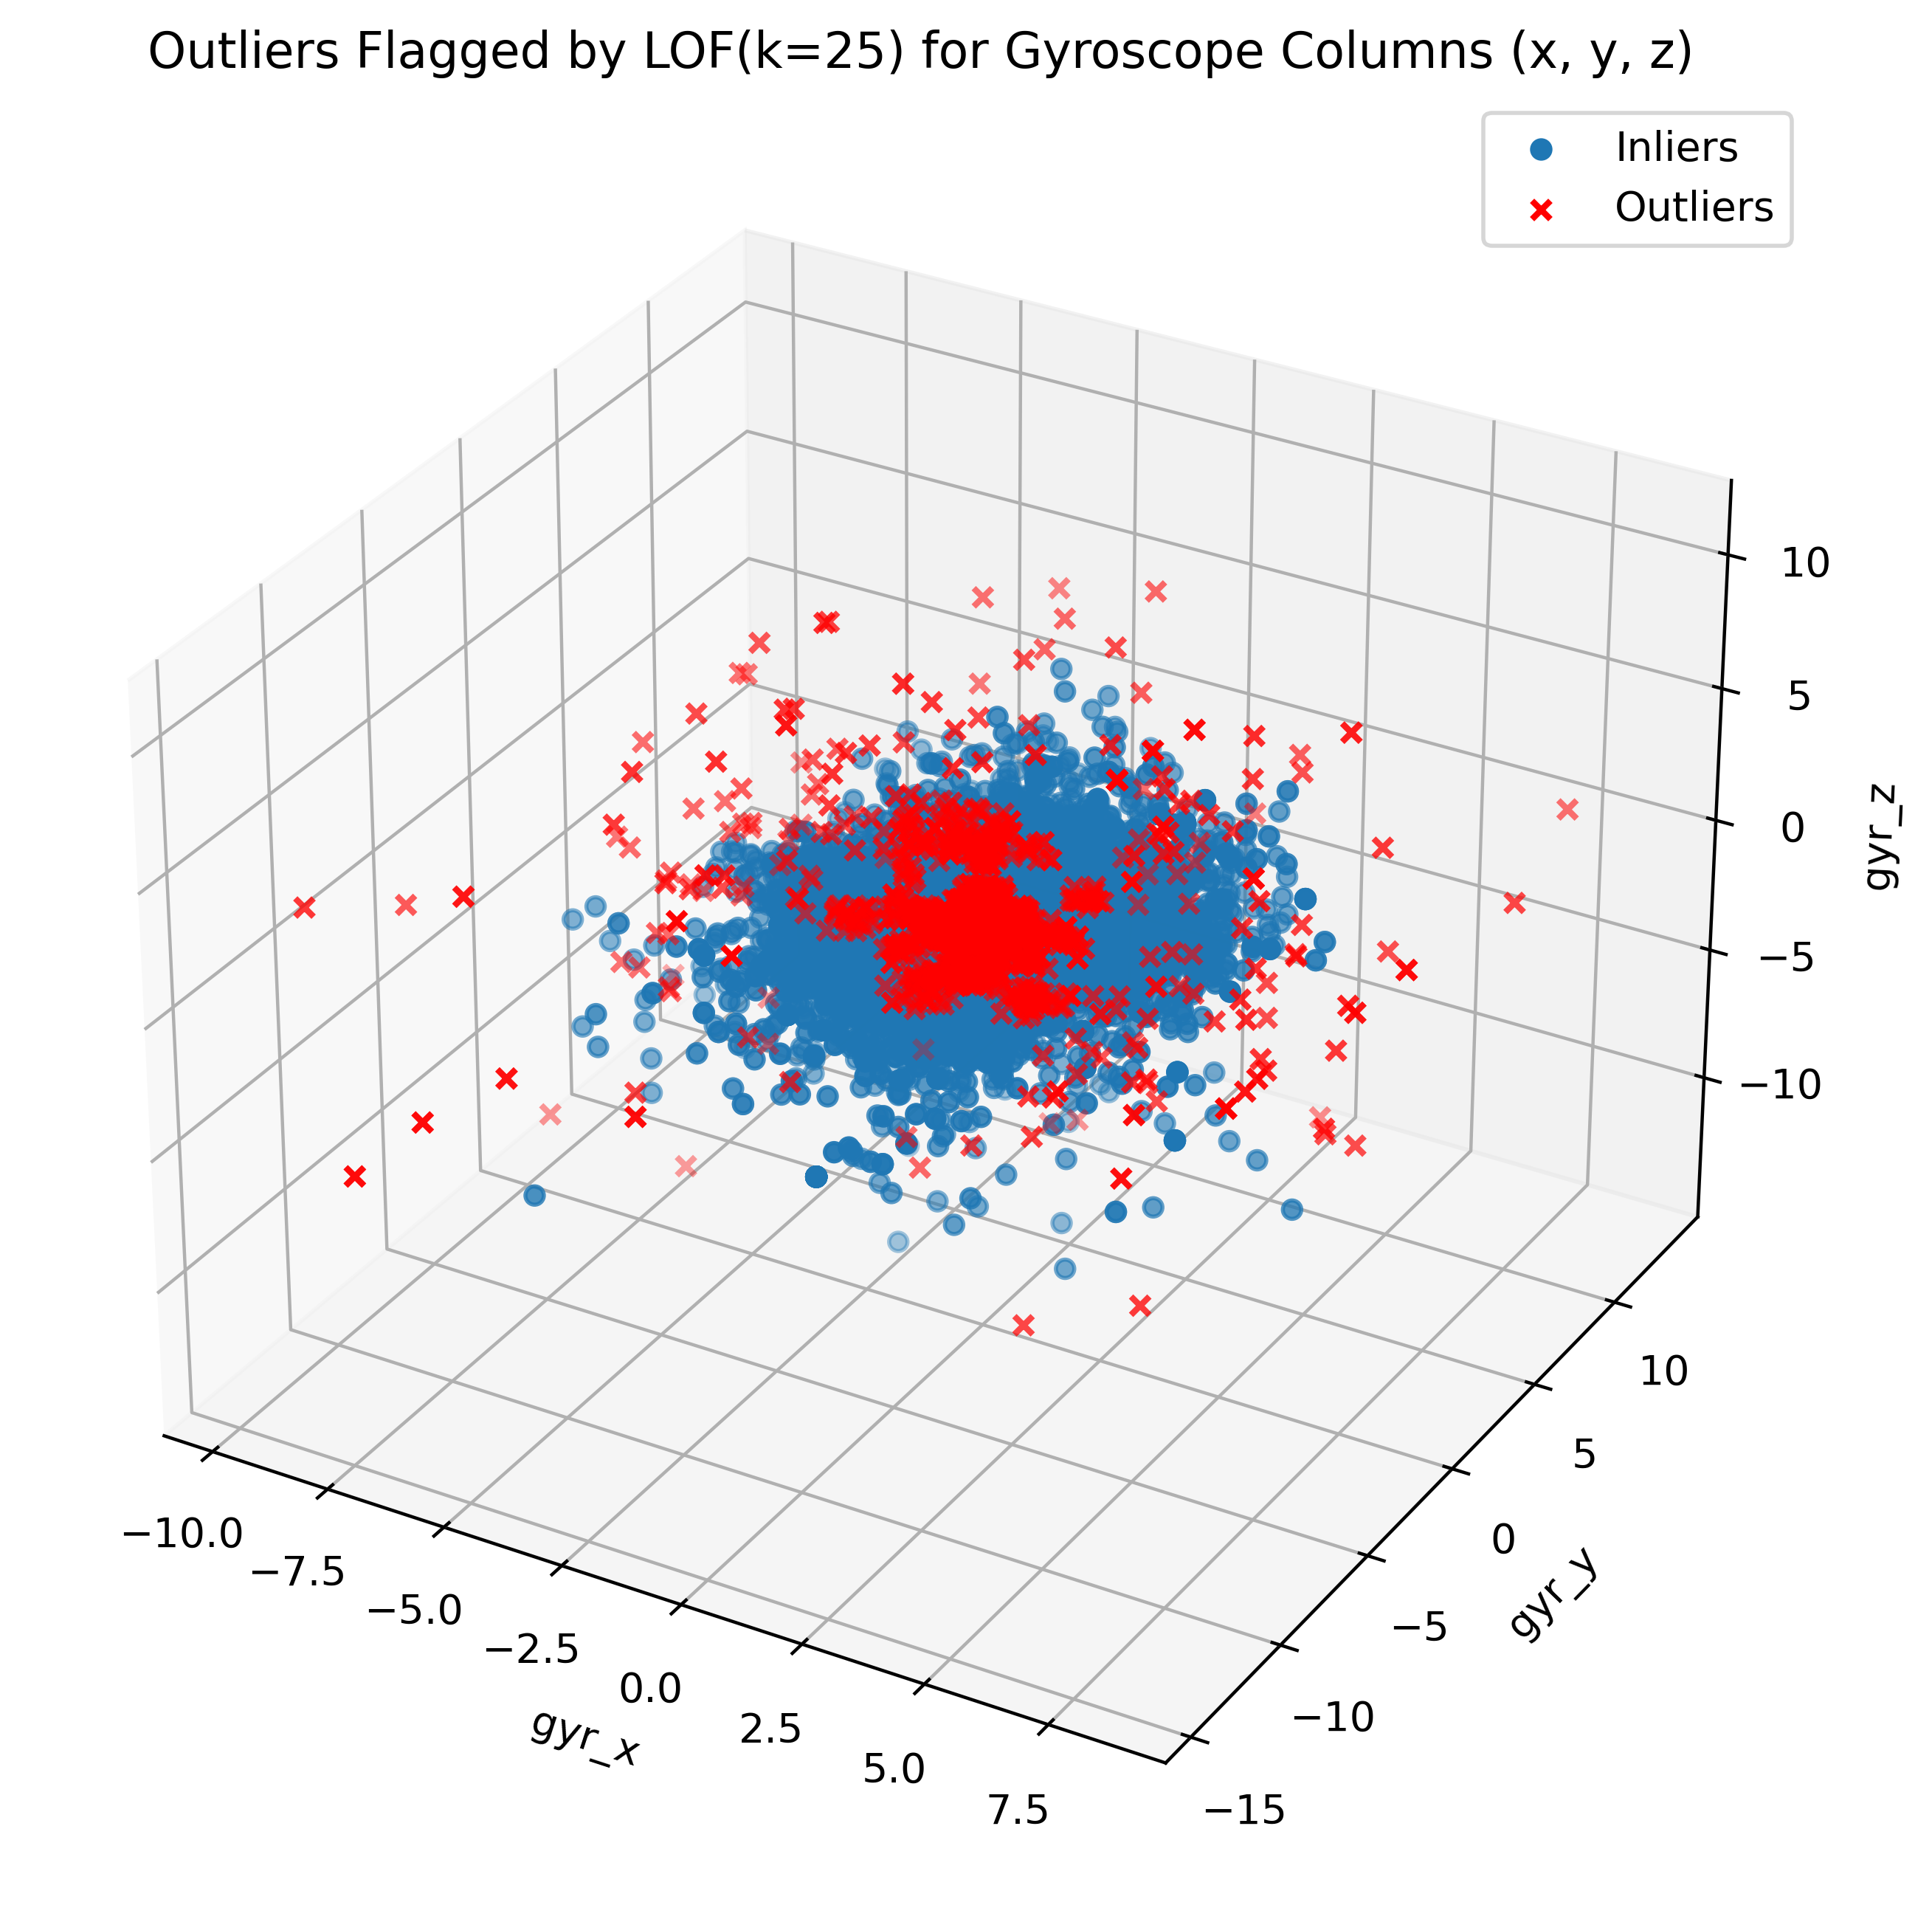

In [32]:
df3 = pl(df2, gyr_columns, 25, outlier_set="gyroscope")

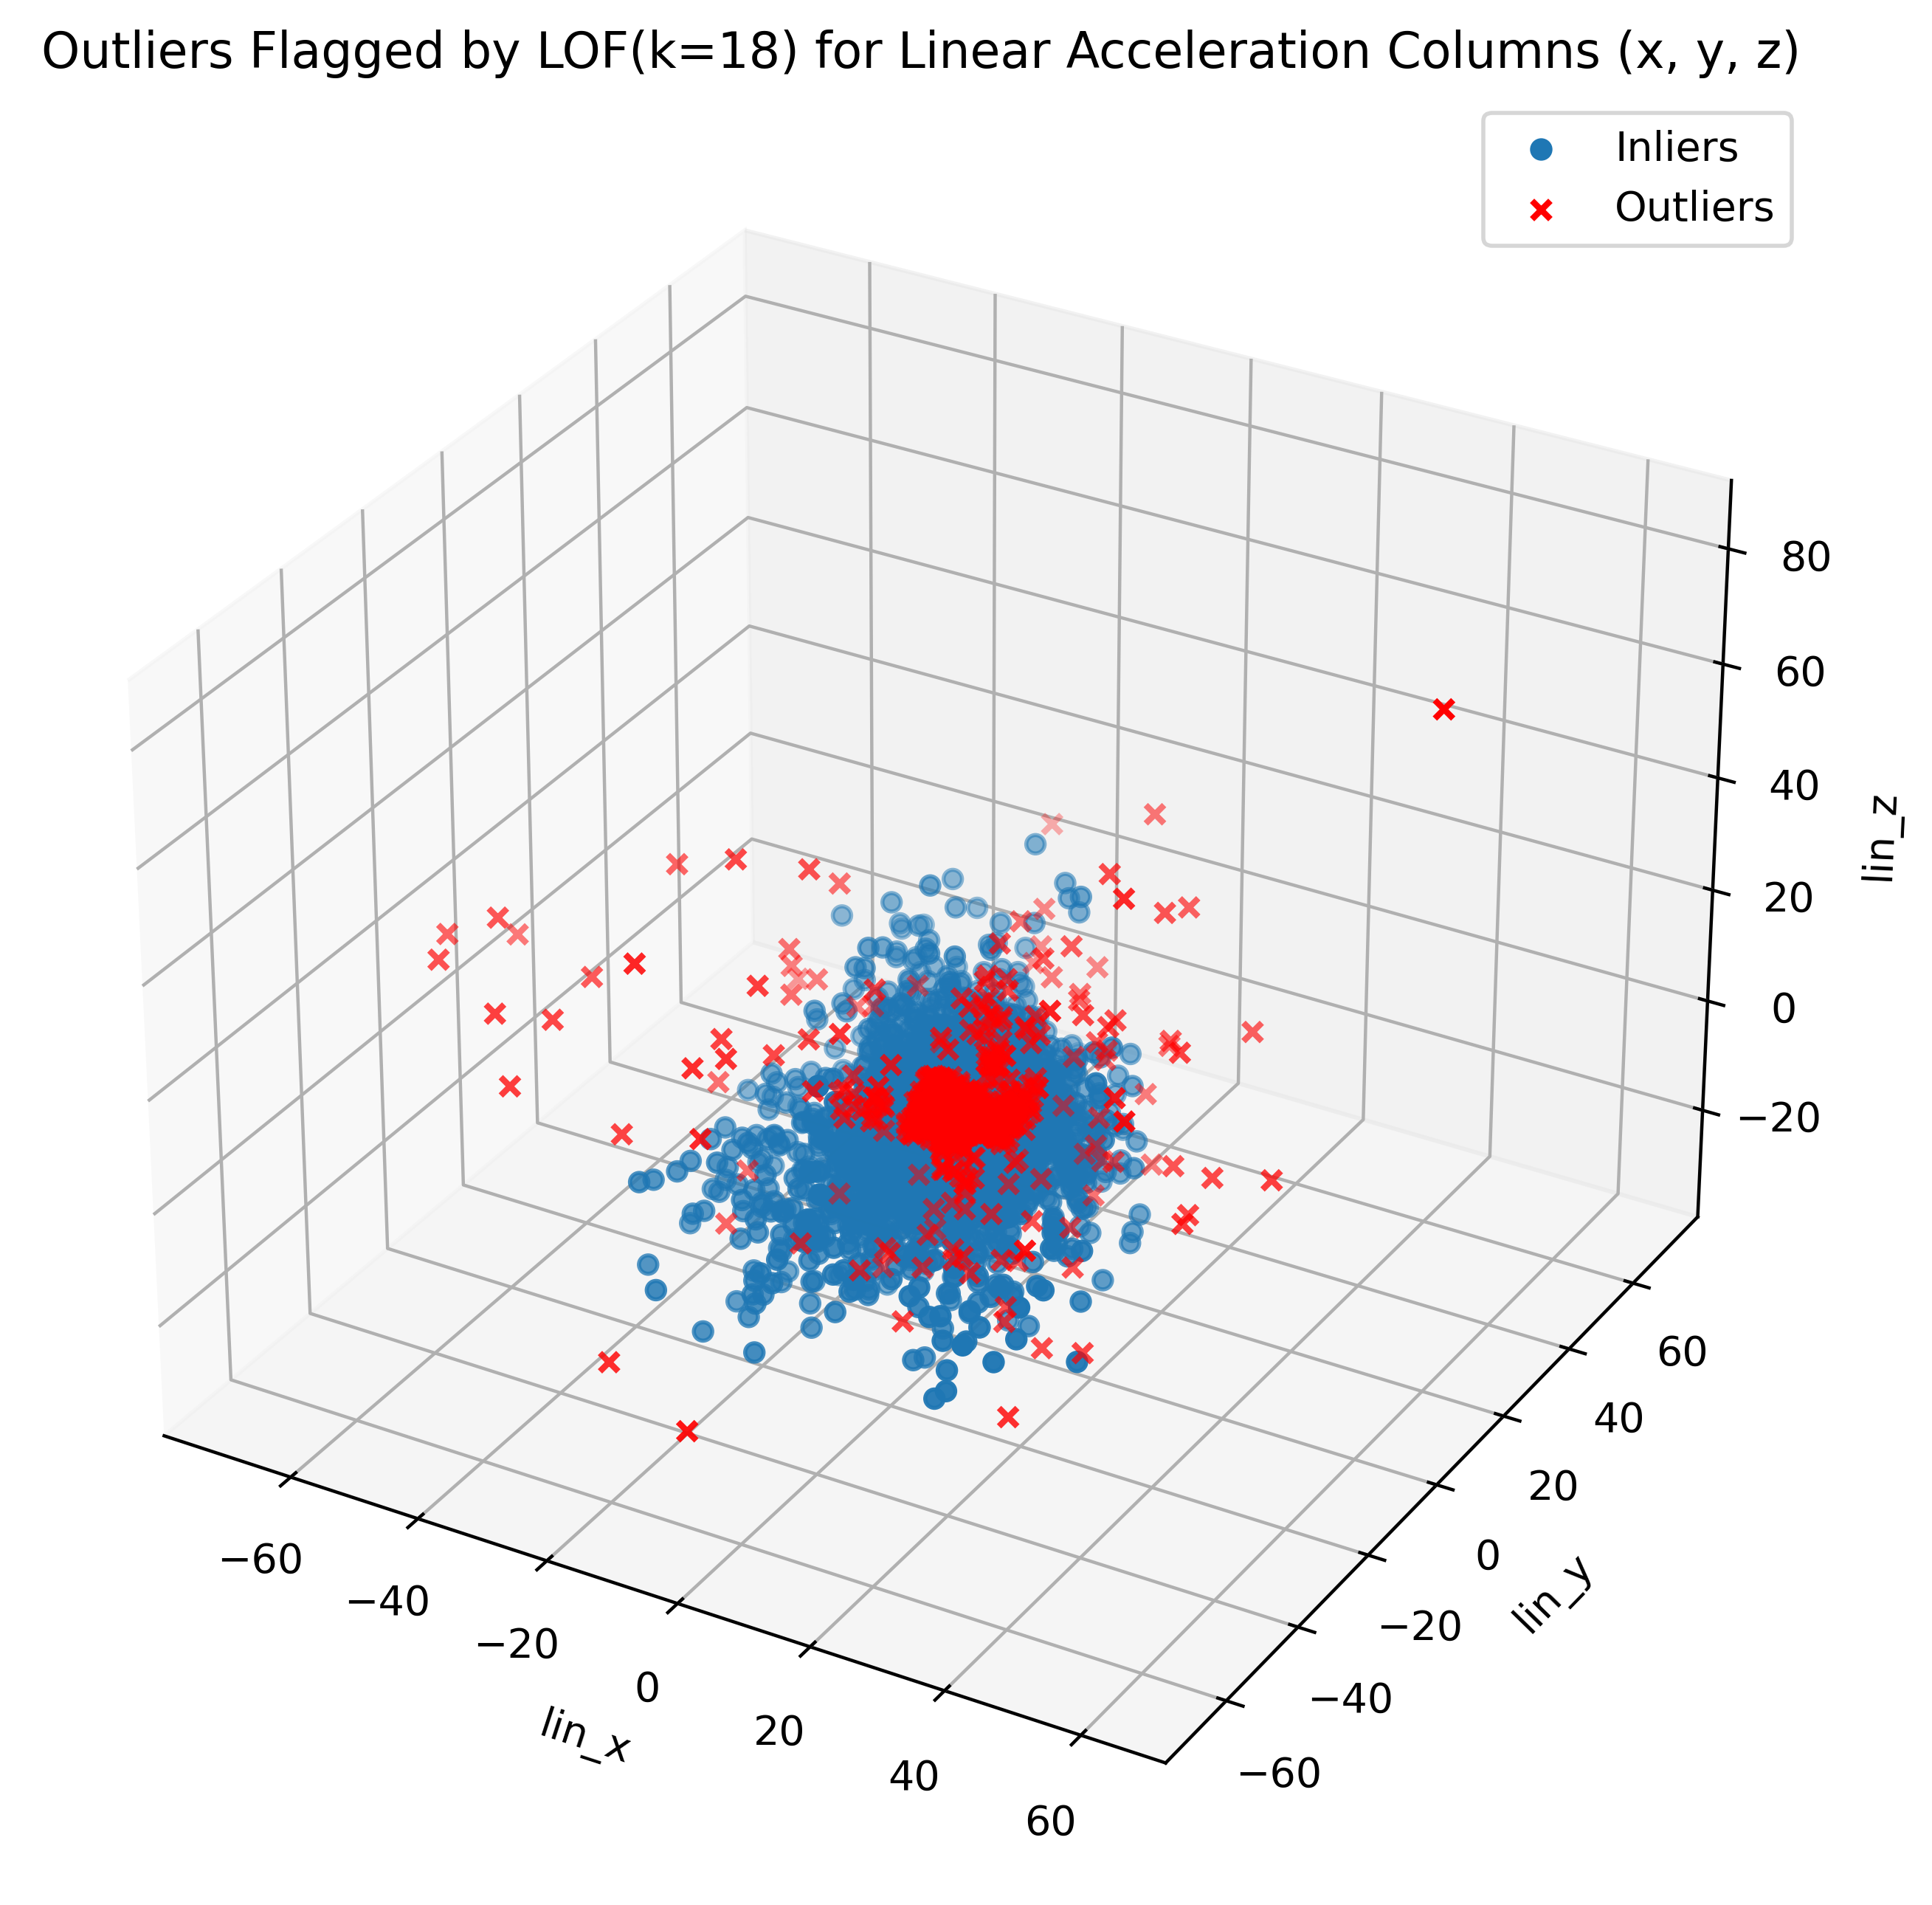

In [34]:
df4 = pl(df3, lin_columns, 18, outlier_set="linearAcceleration")

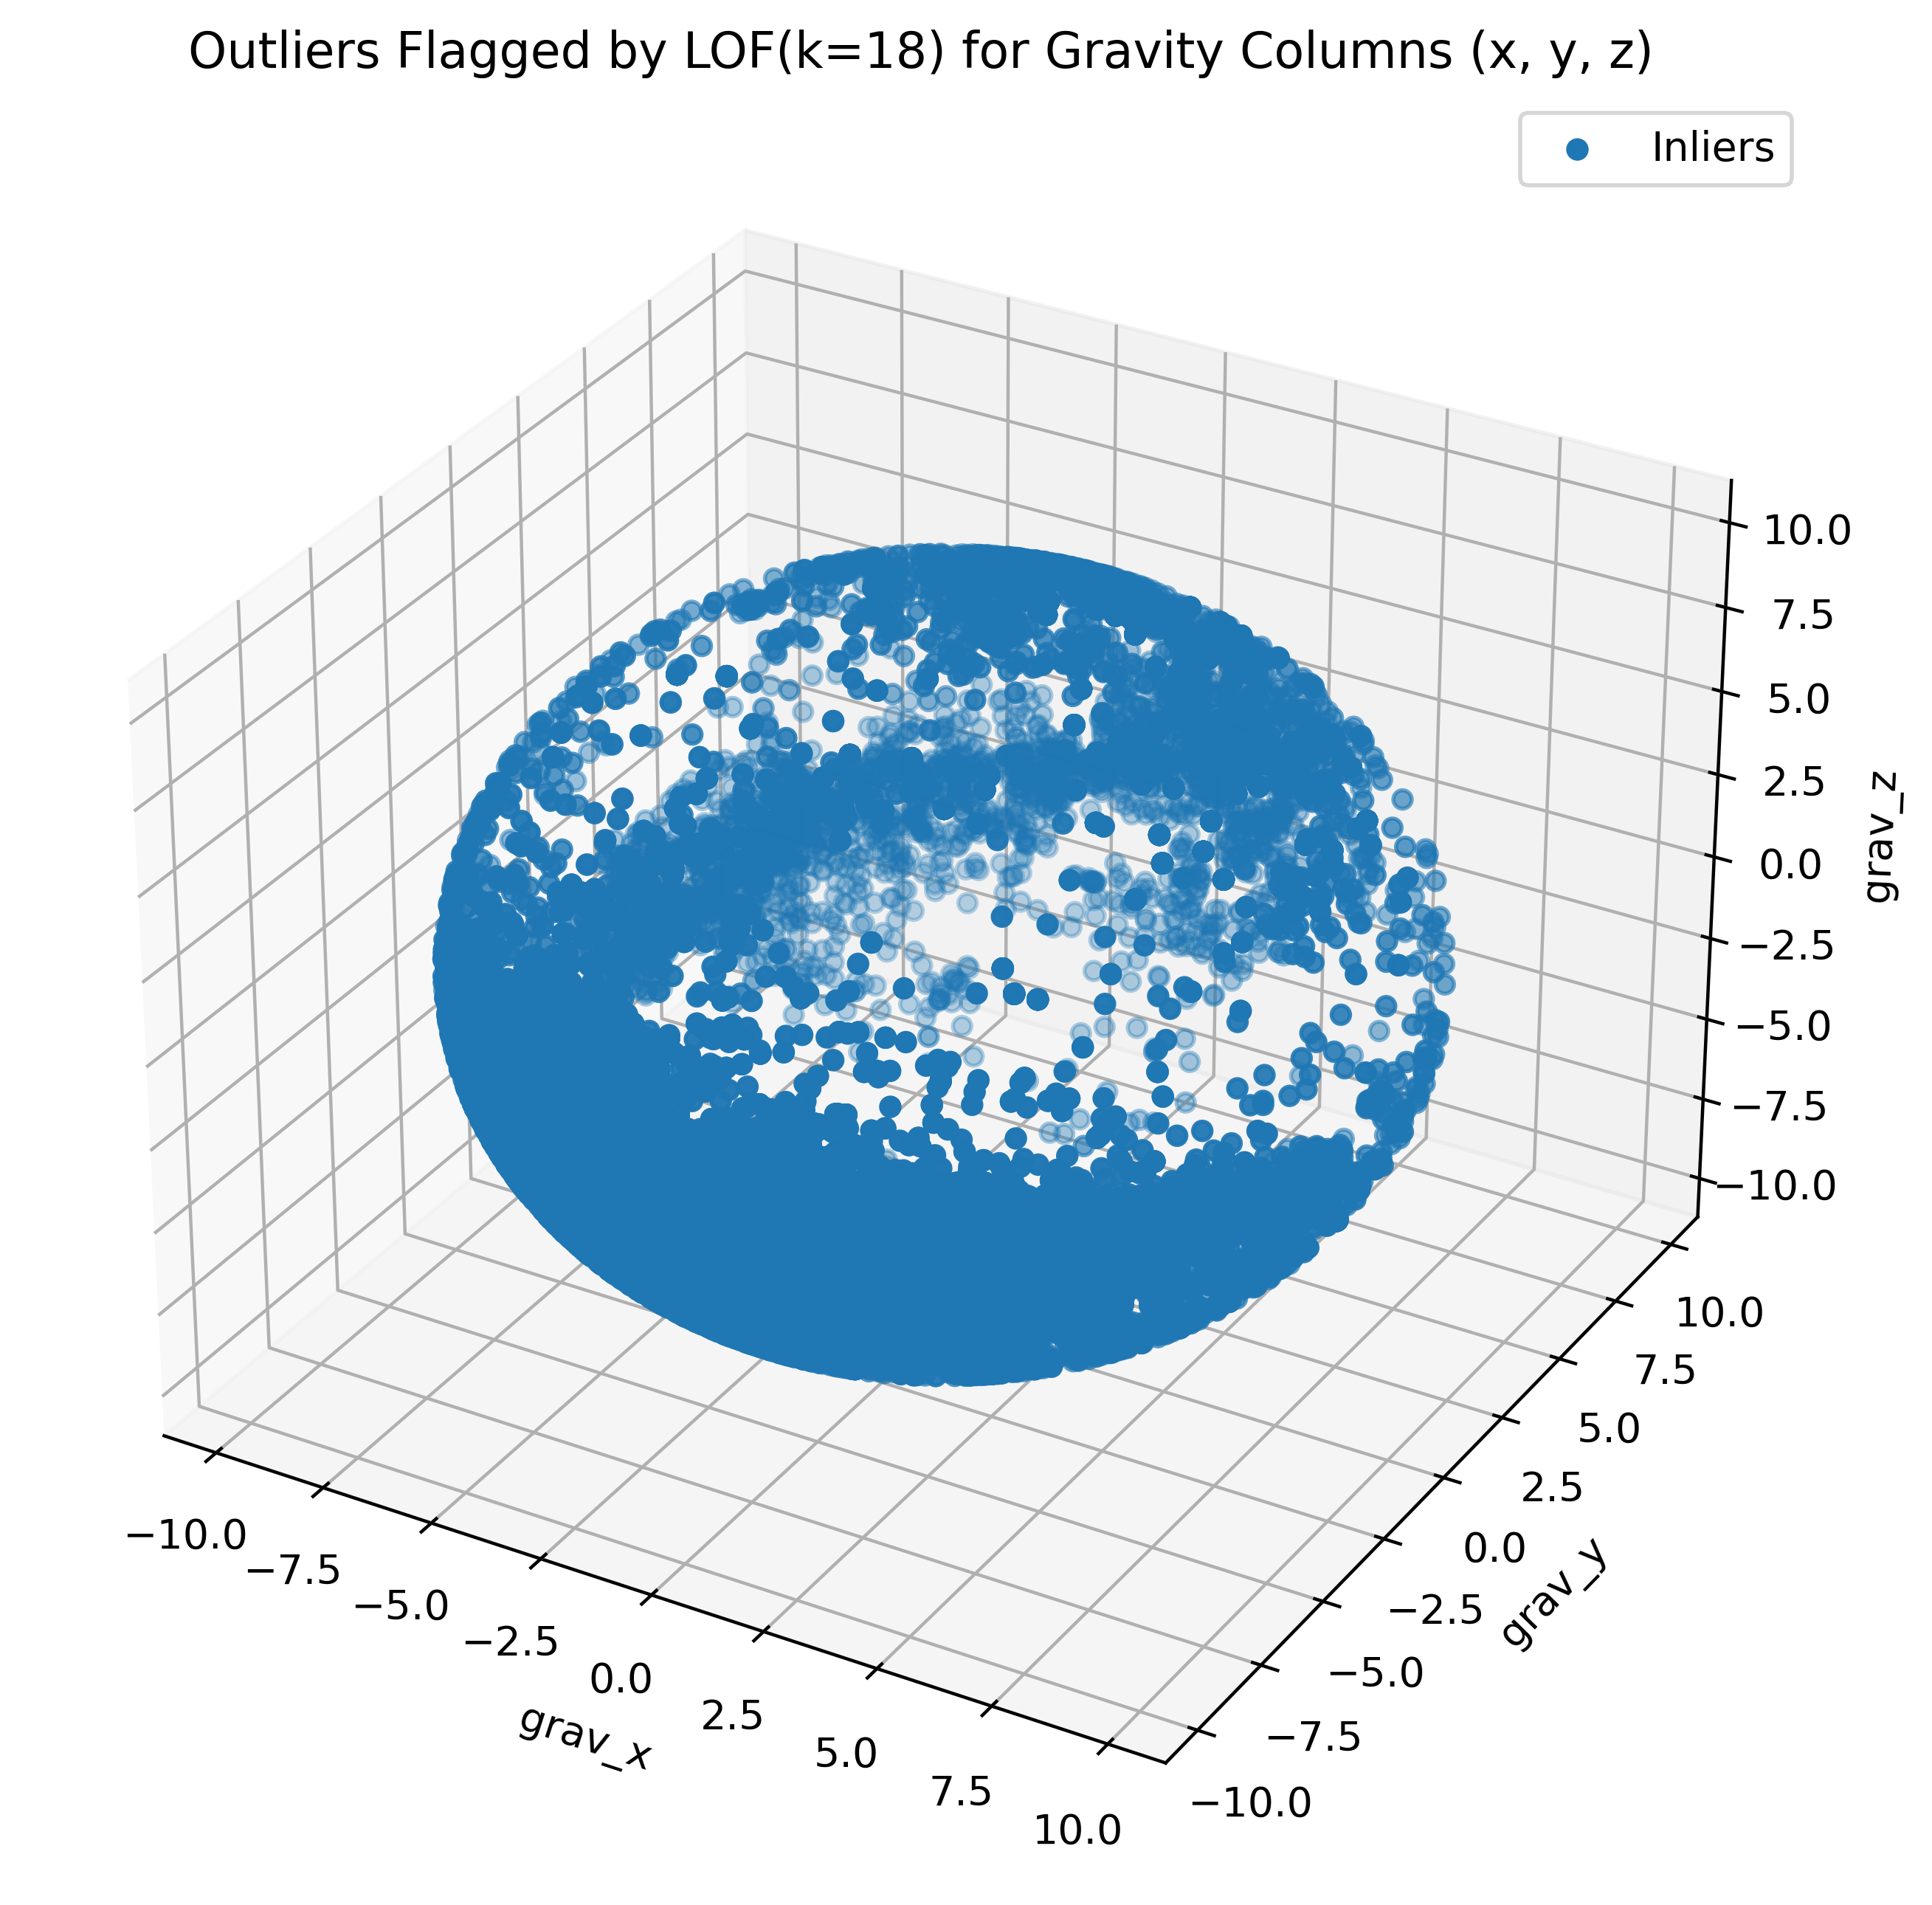

In [20]:
_ = pl(df4, grav_columns, 18, outlier_set="gravity")

In [38]:
for col in outlier_columns:
    df4[col] = df4[col].interpolate()

In [39]:
for col in df4.columns:
    if 'LOF' in col or col == 'activity':
        df4.drop(col, axis=1, inplace=True)

In [41]:
df4.to_csv('A3_dataset/COMBINED_ch3_result.csv')